In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle
import json
import torch
from tqdm import tqdm, tqdm_notebook

from performance import *
from pycit import *
from bullseye import bullseye_network, get_ci_dict
from mapping import ModelManager

# matplotlib and seaborn settingso
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

sns.set_style("white")

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14}

# plt.legend(prop={'family':'serif', 'size': 12}, loc=4)

epoch          : 1
    loss           : 0.5746382023101528
    detection_atper: 0.04598577475289803
    val_loss       : 0.5472850824924226
    val_detection_atper: 0.08687199325497198
Saving current best: model_best.pth ...
    epoch          : 2
    loss           : 0.5576501387983697
    detection_atper: 0.1135558378709063
    val_loss       : 0.532570833855487
    val_detection_atper: 0.11547728276451681
Saving current best: model_best.pth ...
    epoch          : 3
    loss           : 0.5435197417322359
    detection_atper: 0.15070004830278802
    val_loss       : 0.5050859761999008
    val_detection_atper: 0.21839289552055505
Saving current best: model_best.pth ...
    epoch          : 4
    loss           : 0.5376716158161424
    detection_atper: 0.16675291983511167
    val_loss       : 0.5382871868762564
    val_detection_atper: 0.1786627674925547
    epoch          : 5
    loss           : 0.5348987107135389
    detection_atper: 0.17128569046377262
    val_loss       : 0.5264

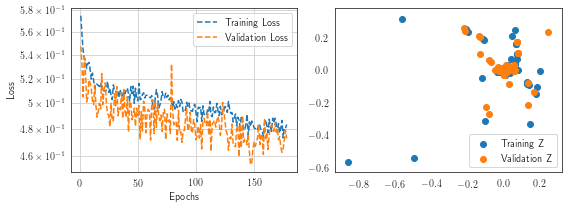

In [2]:
config_path = "config/experiment_backblaze_mapping.json"
manager = ModelManager(config_path, make_plots=True)
manager.train()

In [3]:
def save_z_trainvalid(model_manager, out_file, checkpoint_file="model_best.pth"):
    device = model_manager.load_model(checkpoint_file)
    zdata,ydata,pdata = [],[],[]
    
    # train
    for batch_idx, (data, target) in enumerate(model_manager.data_loader):
        with torch.no_grad():
            pred,z = model_manager.model(data.to(device))
            
        zdata.append(z.cpu().numpy())
        pdata.append(pred.cpu().numpy())
        ydata.append(target.numpy())
    
    # valid
    for batch_idx, (data, target) in enumerate(model_manager.valid_data_loader):
        with torch.no_grad():
            pred,z = model_manager.model(data.to(device))
        
        zdata.append(z.cpu().numpy())
        pdata.append(pred.cpu().numpy())
        ydata.append(target.numpy())

    zdata = np.concatenate(zdata)
    ydata = np.concatenate(ydata)
    pdata = np.concatenate(pdata)
    pickle.dump((zdata, ydata, pdata), open(out_file, "wb"))

save_z_trainvalid(manager, 'data/backblaze_mapping_new.pkl', checkpoint_file="model_best.pth")